### CouponQuest: Code for Preliminary Data Analysis, Random Forest Model, and BIRCH Model

In [1]:
#Imports
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [2]:
final_df = pd.read_csv('final_data.csv', index_col ='customer_id')
final_df = final_df.drop(final_df.columns[0], axis = 1) 

In [3]:
final_df.head()

,item_id,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket,brand_type,redemption_status,campaign_type,class
customer_id,,,,,,,,,,,,,,,
857,31590,1,59.84,0.0,0.0,6,0.0,0,1,0,7,1,0.0,1,0
857,31590,1,59.84,0.0,0.0,6,0.0,0,1,0,7,1,0.0,1,0
857,31590,1,59.84,0.0,0.0,6,0.0,0,1,0,7,1,0.0,1,0
857,31590,1,59.84,0.0,0.0,6,0.0,0,1,0,7,1,0.0,1,0
857,31590,1,59.84,0.0,0.0,6,0.0,0,1,0,7,1,0.0,1,0


In [4]:
features = ['selling_price', 'income_bracket', 'age_range', 'other_discount', 'campaign_type']
top_features = final_df.filter(features)

In [5]:
top_features

,selling_price,income_bracket,age_range,other_discount,campaign_type
customer_id,,,,,
857,59.84,7,6,0.00,1
857,59.84,7,6,0.00,1
857,59.84,7,6,0.00,1
857,59.84,7,6,0.00,1
857,59.84,7,6,0.00,1
...,...,...,...,...,...
1492,89.05,3,4,-17.45,1
1492,89.05,3,4,-17.45,1
1492,89.05,3,4,-17.45,1


### Data Analysis: Comparison of Customer Demographics against Redemption Status (0 - Coupon Not Redeemed, 1 - Coupon Redeemed)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

df=pd.read_csv('customer_demographics.csv')
train_df=pd.read_csv('train.csv')
combined_df=pd.merge(train_df, df, on='customer_id')

In [7]:
# columns=combined_df.columns
columns=list(df.columns)
columns.remove('customer_id')

redemption_status,0,1
age_range,,
18-25,0.056645,0.026408
26-35,0.183673,0.191901
36-45,0.256677,0.262324
46-55,0.346576,0.385563
56-70,0.085257,0.086268
70+,0.071172,0.047535


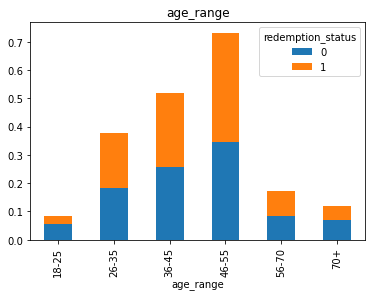

redemption_status,0,1
marital_status,,
Married,0.740174,0.782123
Single,0.259826,0.217877


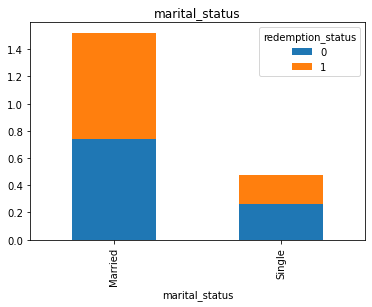

redemption_status,0,1
rented,,
0,0.942543,0.948944
1,0.057457,0.051056


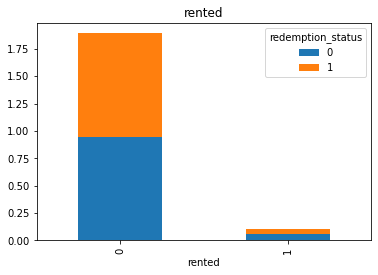

redemption_status,0,1
family_size,,
1,0.311930,0.299296
2,0.386861,0.382042
3,0.143991,0.109155
4,0.071427,0.107394
5+,0.085791,0.102113


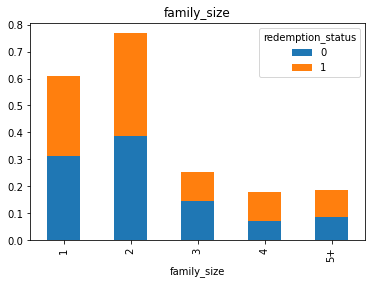

redemption_status,0,1
no_of_children,,
1,0.466291,0.396040
2,0.251768,0.292079
3+,0.281940,0.311881


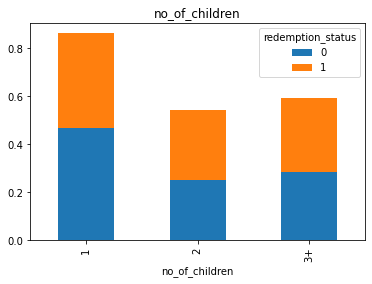

redemption_status,0,1
income_bracket,,
1,0.079363,0.063380
2,0.089690,0.047535
3,0.089272,0.061620
4,0.201355,0.133803
5,0.251062,0.383803
6,0.110389,0.172535
7,0.042072,0.028169
8,0.054440,0.040493
9,0.046133,0.054577


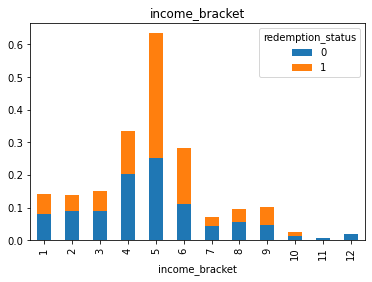

In [8]:
for each_col in columns: 
    pivot_df=combined_df[['redemption_status', each_col]].pivot_table(columns='redemption_status', index=each_col, aggfunc='size')
    display(pivot_df.apply(lambda x: x/x.sum()))
    # display(age_range_df.apply(lambda x: x/x.sum()))
    # display(age_range_df.apply(lambda x: x/x.sum(), axis=1))
    pivot_df.apply(lambda x: x/x.sum()).plot(kind='bar', stacked=True)
    plt.title(each_col)
    plt.show()

In [9]:
pivot_df

redemption_status,0,1
income_bracket,,
1,3420.0,36.0
2,3865.0,27.0
3,3847.0,35.0
4,8677.0,76.0
5,10819.0,218.0
6,4757.0,98.0
7,1813.0,16.0
8,2346.0,23.0
9,1988.0,31.0


In [10]:
#combined_df[['redemption_status', columns[1]]].hist(hue
#combined_df[['redemption_status', columns[1]]].pivot(columns='redemption_status')['age_range']#.plot(kind = 'hist', stacked=True)

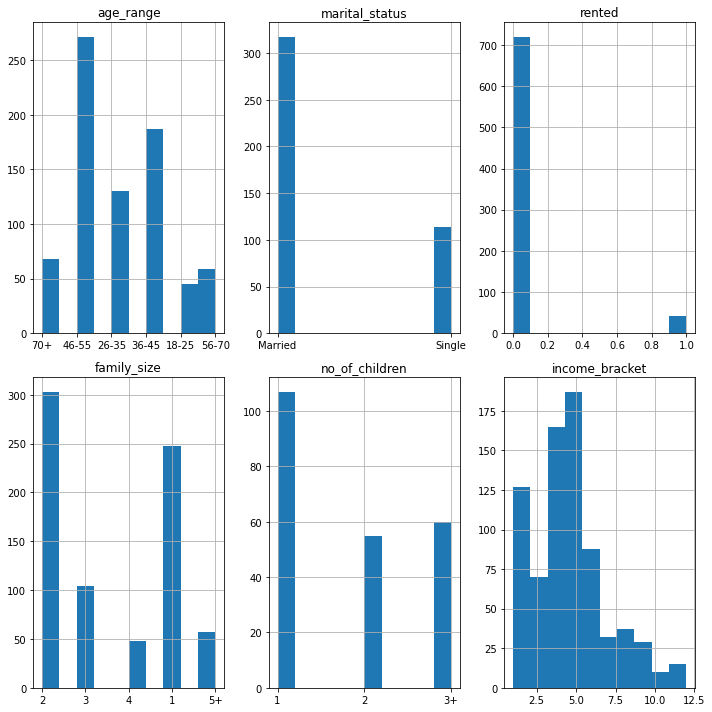

In [11]:
cols=3
rows=math.ceil(len(columns)/cols)
fig, ax=plt.subplots(rows, cols, figsize=(10, 10))
for idx, each_col in enumerate(columns): 
    curr_col=idx%cols
    curr_row=math.floor(idx/cols)
    df[each_col].hist(ax=ax[curr_row][curr_col])
    ax[curr_row][curr_col].set_title(each_col)
plt.tight_layout()

### SMOTE Oversampling Method 

In [12]:
from collections import Counter

In [13]:
final_df.head()

,item_id,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket,brand_type,redemption_status,campaign_type,class
customer_id,,,,,,,,,,,,,,,
857,31590,1,59.84,0.0,0.0,6,0.0,0,1,0,7,1,0.0,1,0
857,31590,1,59.84,0.0,0.0,6,0.0,0,1,0,7,1,0.0,1,0
857,31590,1,59.84,0.0,0.0,6,0.0,0,1,0,7,1,0.0,1,0
857,31590,1,59.84,0.0,0.0,6,0.0,0,1,0,7,1,0.0,1,0
857,31590,1,59.84,0.0,0.0,6,0.0,0,1,0,7,1,0.0,1,0


In [14]:
X = final_df.copy()
X.drop("redemption_status", axis=1, inplace=True)
X.shape

(261198, 14)

In [15]:
y = final_df["redemption_status"]
y.shape

(261198,)

In [16]:
 # train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [17]:
Counter(y_train)

Counter({0.0: 193127, 1.0: 2771})

In [18]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(
    X_train, y_train
)
from collections import Counter

Counter(y_resampled)

Counter({0.0: 193127, 1.0: 193127})

### Random Forest Model

In [19]:
 # Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [20]:
 # Fit the model
rf_model = rf_model.fit(X_resampled, y_resampled)

In [21]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test)

### Random Forest Model Evaluation

In [22]:
 # Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[57455,  6886],
       [  492,   467]])

In [23]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [24]:
acc_score

0.8870137825421133

In [25]:
from imblearn.metrics import classification_report_imbalanced

In [26]:
 # Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.99      0.89      0.49      0.94      0.66      0.45     64341
        1.0       0.06      0.49      0.89      0.11      0.66      0.42       959

avg / total       0.98      0.89      0.49      0.93      0.66      0.45     65300



In [27]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,57455,6886
Actual 1,492,467


Accuracy Score : 0.8870137825421133
Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94     64341
         1.0       0.06      0.49      0.11       959

    accuracy                           0.89     65300
   macro avg       0.53      0.69      0.53     65300
weighted avg       0.98      0.89      0.93     65300



### BIRCH MODEL (Balanced Iterative Reducing and Clustering using Hierarchies)

Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) is a clustering algorithm that can cluster large datasets by first generating a small and compact summary of the the large dataset that retains as much information as possible. This smaller summary is then clustered instead of clustering the larger dataset. In most cases, BIRCH only requires a single scan of the database.

In [28]:
#Imports
from sklearn.cluster import Birch
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [29]:
# Create the BIRCH clustering model
model = Birch(branching_factor = 50, n_clusters = 2, threshold = 0.5)

In [30]:
 # Fit the model
b_model = model.fit(final_df)

In [31]:
# Making predictions using the testing data
predictions = b_model.predict(final_df)

### Model Evaluation Using Silhouette Scores

A higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same class.
b: The mean distance between a sample and all other points in the next nearest cluster.

In [34]:
labels=b_model.labels_
metrics.silhouette_score(final_df, labels, metric='euclidean')

0.6937082245457686

In [ ]:
# 2 clusters = 0.925986203445756 -> on average, 30% of the points are "heterogenous"
# 3 clusters = 0.6997598996318252
# 4 clusters = 0.4642243826811728


### Experimenting with Plots
Overall results appear pretty inconclusive

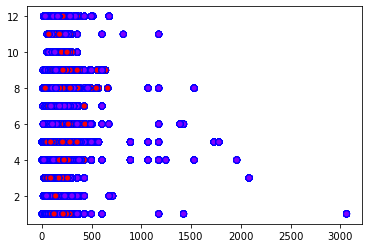

In [39]:
plt.scatter(x = final_df['selling_price'],
            y = final_df['income_bracket'],
            c = predictions, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show()

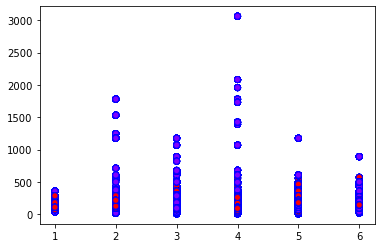

In [35]:
# Creating a scatter plot
plt.scatter(x = final_df['age_range'],
            y = final_df['selling_price'] ,
            c = predictions, 
            cmap = 'rainbow', 
            alpha = 0.7, 
            edgecolors = 'b')
plt.show()

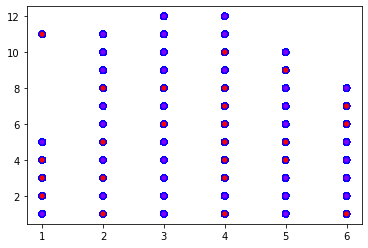

In [36]:
# Creating a scatter plot
plt.scatter(x = final_df['age_range'],
            y = final_df['income_bracket'],
            c = predictions, 
            cmap = 'rainbow', 
            alpha = 0.7, 
            edgecolors = 'b')
plt.show()